In [1]:
# set working directory
import sys
import os
from pathlib import Path
sys.path.insert(0, Path(os.getcwd()).parent)
os.chdir(sys.path[0])

# Unsupervised ML from Seismic Attributes

In [2]:
# Import libraries
from cuml.manifold import UMAP
import pandas as pd
import plotly.graph_objects as go
import os
import rasterio
import geopandas as gpd
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sknetwork.clustering import Louvain

In [11]:
# Import functions from the functions script
from functions.functions import pre_process
from functions.functions import run_umap
from functions.functions import get_classes
from functions.functions import preprocess_pipeline
from functions.functions import Umap_vis
from functions.functions import clusters
from functions.functions import re_order_clusters
from functions.functions import Umap_vis_alternative

## Pre process the Dataframes

In [4]:
# Define the path to the dataframes of extracted features
directory_path = 'data/features'

# Import the gas field and dry structure polygons
gas = gpd.read_file('data/boundaries/Gas_json.geojson')
nogas = gpd.read_file('data/boundaries/No_Gas_json_3857.geojson')

In [ ]:
# Run the preprocessing and dimension reduction
proc_dfs, meta_dfs, umap_obj = preprocess_pipeline(directory_path, 0.95, 100, 0.001, gas, nogas)

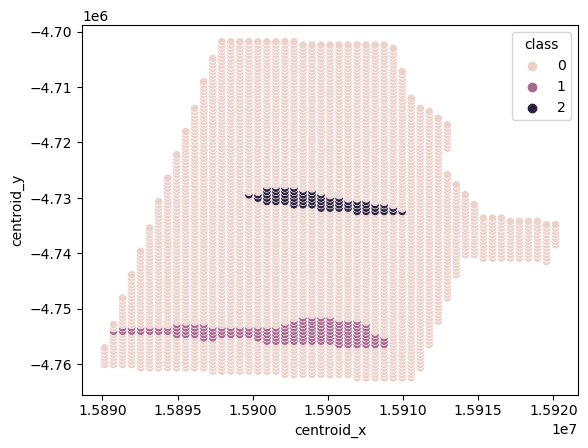

In [6]:
# Check the test and training sets
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=meta_dfs['feats_clr'], x='centroid_x', y='centroid_y', hue='class')

# Show the plot
plt.show()

## Visualise the UMAP Embeddings

In [7]:
for key in proc_dfs:
    print(key)

feats_clr
feats_greyscale
feats_hillshade


In [38]:
clr_list = ['#808080', '#800080', '#FF0000']
Umap_vis(proc_dfs, meta_dfs, 'feats_clr', clr_list)

## Cluster the UMAP Embeddings

In [9]:
for key in umap_obj:
    print(key)

feats_clr
feats_greyscale
feats_hillshade


In [39]:
# get clusters using the Louvain clustering method
df = clusters(umap_obj, 'feats_clr', proc_dfs)

[0 1 2 3 4 5 6 7 8 9]


In [40]:
# get clusters using the Louvain clustering method
df = re_order_clusters(df)

In [41]:
# visualise the clusters
Umap_vis_alternative(df, 'feats_clr')

## Visualise the clusters in plan view

In [42]:
# Add the geometry column to the ML results
df['geometry'] = meta_dfs['feats_clr']['geometry']

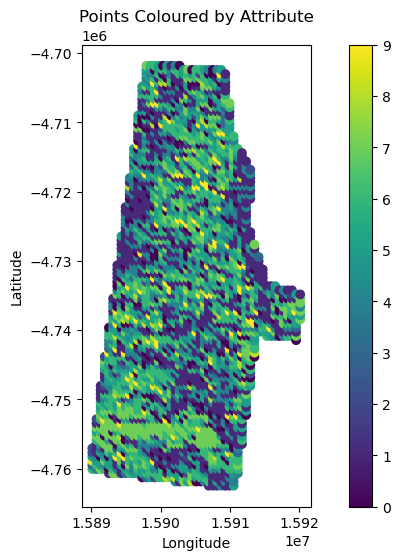

In [43]:
# visualise the cluster results
gdf = gpd.GeoDataFrame(df, geometry='geometry')
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, column='reordered_cluster', legend=True)

# Customizations
ax.set_title('Points Coloured by Attribute')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()